In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import load_dataset
import pandas as pd
dataset = load_dataset("emotone_ar")
train_dataset = dataset["train"]
df = pd.DataFrame({"tweet": train_dataset["tweet"], "label": train_dataset["label"]})

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df

,tweet,label
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1
2,كتنا نيله ف حظنا الهباب xD,3
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0
...,...,...
10060,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,3
10061,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,6
10062,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد 😃,0
10063,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,2


In [18]:
df['text'] =df['tweet']

In [ ]:
df = df.drop('tweet', axis=1)

In [20]:
# df['labels'] = df['label'].replace({'negative': 0, 'positive': 1})
df['labels'] = df['label']

In [21]:
df = df.drop('label', axis=1)

In [22]:
from sklearn.model_selection import train_test_split
# Split data into train and eval DataFrames
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of train_df and eval_df
print("Train DataFrame shape:", train_df.shape)
print("Eval DataFrame shape:", eval_df.shape)

Train DataFrame shape: (8052, 3)
Eval DataFrame shape: (2013, 3)


In [23]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

<Axes: xlabel='labels', ylabel='count'>

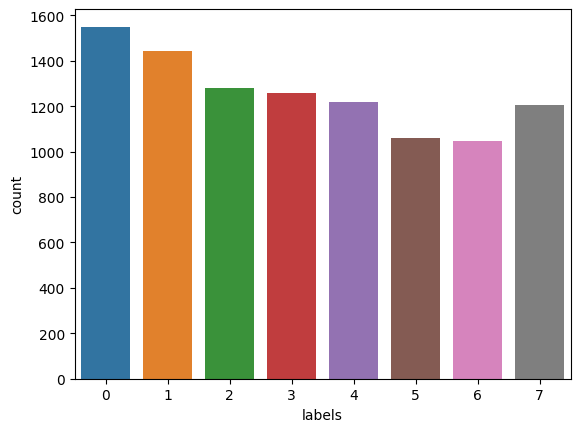

In [24]:
import seaborn as sns
sns.countplot(x=df["labels"])

In [25]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

"""# Preparing train data
train_data = [
    ["Aragorn was the heir of Isildur", 1],
    ["Frodo was the heir of Isildur", 0],
    ["Pippin is stronger than Merry", 2],
]
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Preparing eval data
eval_data = [
    ["Aragorn was the heir of Elendil", 1],
    ["Sam was the heir of Isildur", 0],
    ["Merrry is stronger than Pippin", 2],
]
eval_df = pd.DataFrame(eval_data)
eval_df.columns = ["text", "labels"]"""

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=3)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'asafaya/bert-base-arabic',
    num_labels=8,
    args=model_args,
    # use_cuda= False
)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Make predictions with the model
#predictions, raw_outputs = model.predict(["Sam was a Wizard"])


Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.

  0%|          | 0/8052 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1007 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1007 [00:00<?, ?it/s]

  0%|          | 0/2013 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/252 [00:00<?, ?it/s]

In [26]:
result

{'mcc': 0.6827199404800426, 'eval_loss': 0.8898686198961168}

In [27]:
predictions, raw_outputs = model.predict(["الموت"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

array([3])